<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Logo_exactas.svg/800px-Logo_exactas.svg.png" alt="Logo Exactas UBA" style="width:100px;">
<img src="
https://ic.fcen.uba.ar/images/logo.png" alt="Logo Instituto de Cálculo" style="width:100px;">

# **TP 1: SUBE-2023** 



### Participantes: Joaquín Koifman y Tobías Palacín Roitbarg

## Procesamiento de datos

In [35]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd
import json
import plotly.express as px

In [36]:
# Leer dataset y ver las primeras filas
datos_sube_2023 = pd.read_csv("sube-2023.csv")
datos_sube_2023.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO


#### **1. a)** Transformar la columna `DIA_TRANSPORTE` para que sea reconocida como una fecha.

In [37]:
sube_2023=datos_sube_2023.rename(columns={"DIA_TRANSPORTE" : "FECHA"}) # Renombrar la columna por comodidad
sube_2023['FECHA'] = pd.to_datetime(sube_2023['FECHA']) # Aplicar el cambio del tipo de dato sobre la columna correspondiente con la librería datetime
sube_2023.head()

,FECHA,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO


In [38]:
sube_2023['FECHA'].dtype # Corroboramos por consola que se trata del tipo M8, que es otra forma de llamarle al tipo datetime64

dtype('<M8[ns]')

#### **b)** Agregar tres columnas al DataFrame:
* `FECHA_DIA`
* `FECHA_ORDINAL`
* `FECHA_MES`

In [39]:
sube_2023["DIA_TRANSPORTE"] = sube_2023["FECHA"].dt.strftime('%a').str[:3]

sube_2023["FECHA_ORDINAL"] = sube_2023["FECHA"].dt.dayofyear

sube_2023["FECHA_MES"] = sube_2023["FECHA"].dt.strftime('%m')

sube_2023.head()

,FECHA,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,DIA_TRANSPORTE,FECHA_ORDINAL,FECHA_MES
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Sun,1,01
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Sun,1,01
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Sun,1,01
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Sun,1,01
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Sun,1,01


#### **2.**  Crear el DataFrame `datos_amba`


In [40]:
datos_amba = sube_2023.loc[(sube_2023["AMBA"] == "SI") & (sube_2023["DATO_PRELIMINAR"]== "NO")] # Filtrar para obtener el DataFrame con las restricciones pedidas
datos_amba = datos_amba[["FECHA","DIA_TRANSPORTE","FECHA_MES","FECHA_ORDINAL","JURISDICCION","LINEA","CANTIDAD","TIPO_TRANSPORTE"]] # Quedarse con las columnas de interés
datos_amba = datos_amba.rename(columns={"CANTIDAD": "pasajeros","DIA_TRANSPORTE":"fecha_dia"}) # Renombrar columnas con nombres más descriptivos
datos_amba.columns = datos_amba.columns.str.lower() # Aplicar .lower() a todas las columnas para que sean iguales a las del DataFrame de salida
datos_amba.head()

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Sun,01,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Sun,01,1,MUNICIPAL,2B,11,COLECTIVO
3,2023-01-01,Sun,01,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
5,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
6,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO


#### **3. a)** Identificar la proporción de la cantidad total anual de pasajeros que le corresponde a cada medio de transporte



In [41]:
pasajeros_por_transporte = datos_amba.groupby("tipo_transporte")["pasajeros"].sum()

total_pasajeros = pasajeros_por_transporte.sum()

proporcion_pasajeros_por_transporte = pasajeros_por_transporte / total_pasajeros

print("Proporción de la cantidad total anual de pasajeros por tipo de transporte:")
print(proporcion_pasajeros_por_transporte)

Proporción de la cantidad total anual de pasajeros por tipo de transporte:
tipo_transporte
COLECTIVO    0.837645
SUBTE        0.068097
TREN         0.094258
Name: pasajeros, dtype: float64


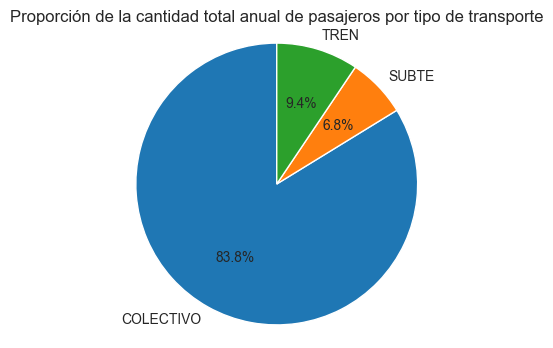

In [98]:
plt.figure(figsize=(4, 4))
plt.pie(proporcion_pasajeros_por_transporte, labels=proporcion_pasajeros_por_transporte.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de la cantidad total anual de pasajeros por tipo de transporte')
plt.axis('equal') 
plt.show()

**b)** Identificar la tupla `(mes, línea de subte)` donde viajó la mayor cantidad de pasajeros.

In [43]:
datos_subte = datos_amba.loc[datos_amba["tipo_transporte"] == "SUBTE",:]

pasajeros_por_mes_y_linea = datos_subte.groupby(["fecha_mes", "linea"])["pasajeros"].sum()

mayor_cantidad_pasajeros = pasajeros_por_mes_y_linea.idxmax()

print("La tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros es:", mayor_cantidad_pasajeros)

La tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros es: ('08', 'LINEA_B')


**c)** Identificar el día hábil con menos concurrencia en el transporte público.

In [44]:
dias_habiles = datos_amba.loc[(datos_amba["fecha_dia"] != "Sun") & (datos_amba["fecha_dia"] != "Sat"),:]

pasajeros_por_dia = dias_habiles.groupby("fecha_dia")["pasajeros"].std()

dia_con_menor_concurrencia = pasajeros_por_dia.idxmin()

cantidad_de_pasajeros = dias_habiles[dias_habiles["fecha_dia"] == dia_con_menor_concurrencia]["pasajeros"].sum()

print("El día hábil con menos concurencia en el transporte público es", dia_con_menor_concurrencia, "con", cantidad_de_pasajeros, "pasajeros")

El día hábil con menos concurencia en el transporte público es Mon con 540161948 pasajeros


Text(0, 0.5, 'Cantidad de pasajeros')

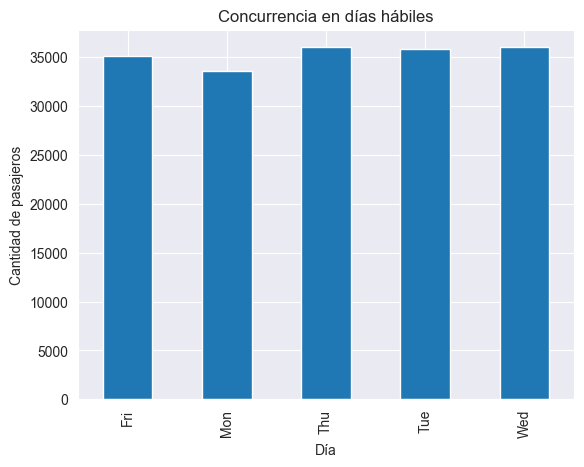

In [45]:
fig, ax = plt.subplots()

pasajeros_por_dia.plot(kind='bar', ax=ax)

ax.set_title('Concurrencia en días hábiles')
ax.set_xlabel('Día')
ax.set_ylabel('Cantidad de pasajeros')

# Análisis Exploratorio

## **4**


In [48]:
sube_2023.head()

,FECHA,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,DIA_TRANSPORTE,FECHA_ORDINAL,FECHA_MES
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Sun,1,01
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Sun,1,01
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Sun,1,01
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Sun,1,01
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Sun,1,01


In [78]:
type(sube_2023)

pandas.core.frame.DataFrame

In [46]:
sube_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472291 entries, 0 to 472290
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   FECHA            472291 non-null  datetime64[ns]
 1   NOMBRE_EMPRESA   472291 non-null  object        
 2   LINEA            472291 non-null  object        
 3   AMBA             472291 non-null  object        
 4   TIPO_TRANSPORTE  472291 non-null  object        
 5   JURISDICCION     469742 non-null  object        
 6   PROVINCIA        469720 non-null  object        
 7   MUNICIPIO        469720 non-null  object        
 8   CANTIDAD         472291 non-null  int64         
 9   DATO_PRELIMINAR  472291 non-null  object        
 10  DIA_TRANSPORTE   472291 non-null  object        
 11  FECHA_ORDINAL    472291 non-null  int64         
 12  FECHA_MES        472291 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 46.8+ MB


In [47]:
sube_2023.describe()

,CANTIDAD,FECHA_ORDINAL
count,472291.000000,472291.000000
mean,9336.927454,186.179231
std,20609.074234,104.469379
min,-417.000000,1.000000
25%,683.000000,96.000000
50%,2627.000000,187.000000
75%,9062.000000,277.000000
max,542616.000000,365.000000


##### Calculamos la media, mediana y desvío estándar de la cantidad de pasajeros.

In [52]:
media_pasajeros = sube_2023['CANTIDAD'].mean()
mediana_pasajeros = sube_2023['CANTIDAD'].median()
desvio_pasajeros = sube_2023['CANTIDAD'].std()

print('Media de pasajeros:', media_pasajeros)
print('Mediana de pasajeros:', mediana_pasajeros)
print('Desvío estándar de pasajeros:', desvio_pasajeros)

Media de pasajeros: 9336.92745362499
Mediana de pasajeros: 2627.0
Desvío estándar de pasajeros: 20609.07423362006


##### Calculamos la suma total de pasajeros a lo largo del 2023.

In [69]:
suma_total_pasajeros = sube_2023['CANTIDAD'].sum()
print(f'Suma total de pasajeros: {suma_total_pasajeros}')

Suma total de pasajeros: 4409746804


##### Calculamos la cantidad total de registros a lo largo del 2023.

In [68]:
conteo_registros = sube_2023['CANTIDAD'].count()
print(f'Número total de registros: {conteo_registros}')

Número total de registros: 472291


##### Calculamos cual fue la cantidad maxima de pasajeros en un solo dia del 2023.

In [77]:
max_pasajeros = sube_2023['CANTIDAD'].max()
dia_max_pasajeros = sube_2023['CANTIDAD'].idxmax()
fecha_max_pasajeros = sube_2023.loc[dia_max_pasajeros, 'FECHA']
print('El dia con la mayor cantidad de pasajeros fue el:', fecha_max_pasajeros, 'con', max_pasajeros)

El dia con la mayor cantidad de pasajeros fue el: 2023-10-12 00:00:00 con 542616


##### Calculamos cuentas lineas de colectivo diferentes hay:

In [92]:
sube_2023[sube_2023['TIPO_TRANSPORTE'] == 'COLECTIVO']['LINEA'].nunique()

1459

##### Calculamos cuentas lineas de subte diferentes hay para ver si estan todas las del AMBA:

In [95]:
sube_2023[sube_2023['TIPO_TRANSPORTE'] == 'SUBTE']['LINEA'].unique()
#efectivamente, si 

array(['LIN_PREMETRO', 'LINEA SUBTE C', 'LINEA SUBTE D', 'LINEA SUBTE E',
       'LINEA SUBTE H', 'LINEA_A', 'LINEA_B'], dtype=object)

### Pasamos ahora a la parte de visualización:

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na 

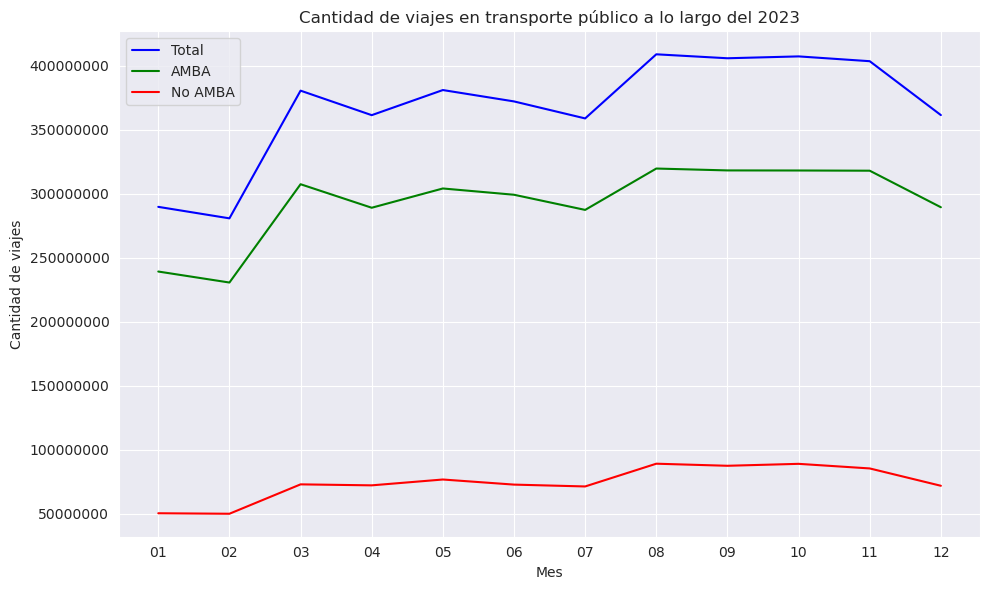

- En promedio, el 80% de todos los viajes que se hicieron en transporte público lo hicieron dentro del AMBA. Solo el 20% restante viajó en otras zonas.
- Se observan caídas pronunciadas en vacaciones de verano e invierno. El mes con menos tráfico es Febrero con una caída de -22%MoM con respecto a Diciembre. 
- El pico de tráfico más alto durante el año fue en el mes de Agosto, donde se registraron 408751702 viajes a lo largo y ancho del país. 


/tmp/ipykernel_33739/811365232.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_33739/811365232.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_33739/811365232.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_33739/811365232.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

In [51]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=sube_2023.groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', label='Total', color='blue')

sns.lineplot(data=sube_2023[sube_2023["AMBA"]=="SI"].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', label='AMBA', color='green')

sns.lineplot(data=sube_2023[sube_2023["AMBA"]=="NO"].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', label='No AMBA', color='red')

plt.title('Cantidad de viajes en transporte público a lo largo del 2023')
plt.xlabel('Mes')
plt.ylabel('Cantidad de viajes')
plt.legend()

plt.ticklabel_format(style='plain', axis='y')  
plt.tight_layout()
plt.show()
print(f"\033[1;32;40m\033[8;10;20m- En promedio, el {round(sube_2023.loc[sube_2023['AMBA']=='SI',:].groupby('FECHA_MES')['CANTIDAD'].sum().mean()*100/sube_2023.groupby('FECHA_MES')['CANTIDAD'].sum().mean())}% de todos los viajes que se hicieron en transporte público lo hicieron dentro del AMBA. Solo el 20% restante viajó en otras zonas.\n- Se observan caídas pronunciadas en vacaciones de verano e invierno. El mes con menos tráfico es Febrero con una caída de -{round((sube_2023.groupby('FECHA_MES')['CANTIDAD'].sum()[11]-sube_2023.groupby('FECHA_MES')['CANTIDAD'].sum()[1])*100/sube_2023.groupby('FECHA_MES')['CANTIDAD'].sum()[11])}%MoM con respecto a Diciembre. \n- El pico de tráfico más alto durante el año fue en el mes de Agosto, donde se registraron {round(sube_2023.groupby('FECHA_MES')['CANTIDAD'].sum()[7])} viajes a lo largo y ancho del país.\033[0m ")


/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na 

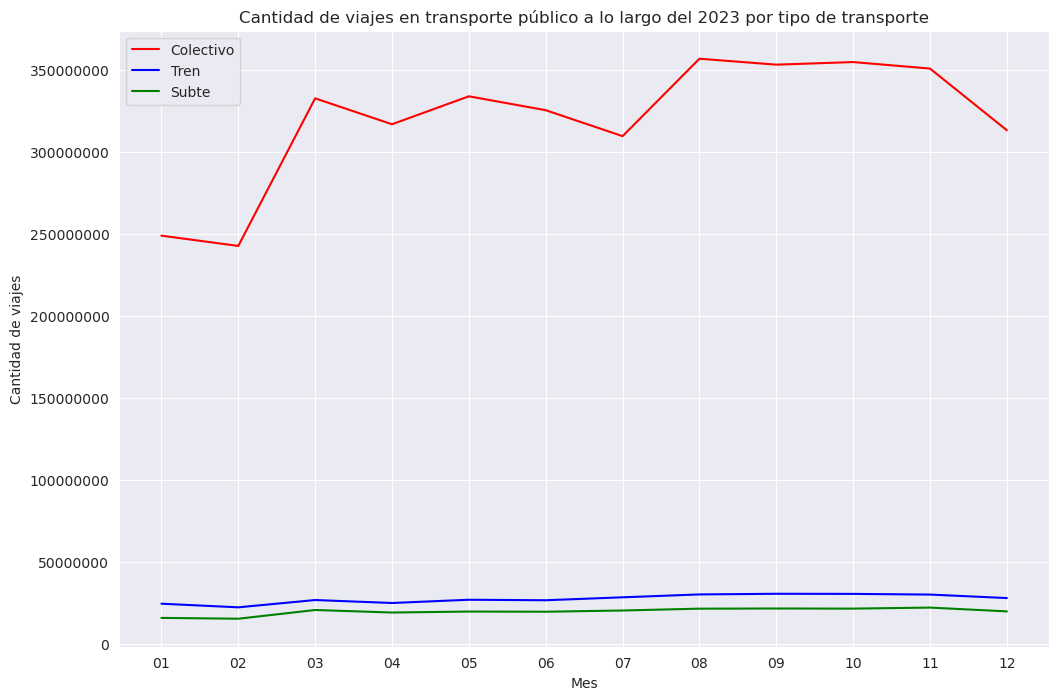

- El colectivo es el medio de transporte más usado, +1056% que el segundo (tren).


In [52]:
plt.figure(figsize=(12, 8))

sns.lineplot(data=sube_2023[sube_2023['TIPO_TRANSPORTE'] == 'COLECTIVO'].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', color='red', label='Colectivo')
sns.lineplot(data=sube_2023[sube_2023['TIPO_TRANSPORTE'] == 'TREN'].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', color='blue', label='Tren')
sns.lineplot(data=sube_2023[sube_2023['TIPO_TRANSPORTE'] == 'SUBTE'].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', color='green', label='Subte')

plt.title('Cantidad de viajes en transporte público a lo largo del 2023 por tipo de transporte')
plt.legend()
plt.xlabel('Mes')
plt.ylabel('Cantidad de viajes')
plt.ticklabel_format(style='plain', axis='y')  
plt.show()

print(f"\033[1;32;40m\033[8;10;20m- El colectivo es el medio de transporte más usado, +{round((sube_2023.loc[sube_2023['TIPO_TRANSPORTE']=='COLECTIVO',:].groupby('FECHA_MES')['CANTIDAD'].sum().mean()-sube_2023.loc[sube_2023['TIPO_TRANSPORTE']=='TREN',:].groupby('FECHA_MES')['CANTIDAD'].sum().mean())*100/sube_2023.loc[sube_2023['TIPO_TRANSPORTE']=='TREN',:].groupby('FECHA_MES')['CANTIDAD'].sum().mean())}% que el segundo (tren).")

##### En el dataset tambien aparece la LANCHA como medio de transporte...pero decidimos no incluirla en el analisis debido a que no se registra a nadie usandolo:

In [86]:
lanchas = sube_2023[sube_2023['TIPO_TRANSPORTE'] == 'LANCHA']
cantidad_total_lanchas = lanchas['CANTIDAD'].sum()
print('La cantidad total de pasajeros de las lanchas es:', cantidad_total_lanchas)


La cantidad total de pasajeros de las lanchas es: 0


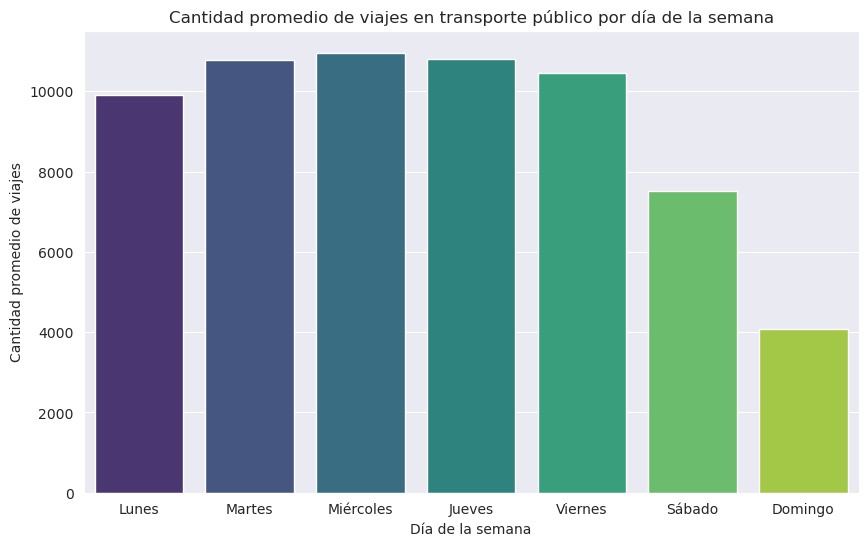

- El día en el que más personas utilizan el transporte público es el miércoles, con 10959 viajes en promedio, mientras que el domingo es el día que menos usuarios utilizan el transporte, con un promedio de 4075


In [53]:
plt.figure(figsize=(10, 6))
sube_2023['DIA_TRANSPORTE'].replace({"Mon": "Lunes", "Tue": "Martes", "Wed": "Miércoles", "Thu": "Jueves", "Fri": "Viernes", "Sat": "Sábado", "Sun": "Domingo"}, inplace=True)
sns.barplot(data=sube_2023.groupby("DIA_TRANSPORTE")["CANTIDAD"].mean().reset_index(), x='DIA_TRANSPORTE', y='CANTIDAD',order=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], palette='viridis')
plt.title('Cantidad promedio de viajes en transporte público por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad promedio de viajes')
plt.ticklabel_format(style='plain', axis='y')  
plt.show()

print(f"\033[1;32;40m\033[8;10;20m- El día en el que más personas utilizan el transporte público es el miércoles, con {round(sube_2023.loc[sube_2023['DIA_TRANSPORTE'] == 'Miércoles', :].groupby('DIA_TRANSPORTE')['CANTIDAD'].mean().mean())} viajes en promedio, mientras que el domingo es el día que menos usuarios utilizan el transporte, con un promedio de {round(sube_2023.loc[sube_2023['DIA_TRANSPORTE'] == 'Domingo', :].groupby('DIA_TRANSPORTE')['CANTIDAD'].mean().mean())}")


In [54]:
with open ("./ProvinciasArgentina.geojson") as f:
    data = json.load(f)

data_mapa = sube_2023.loc[sube_2023['AMBA'] == 'NO',:]
data_mapa["PROVINCIA"]=data_mapa["PROVINCIA"].replace({
    'SANTIAGO DEL ESTERO': 'Santiago del Estero',
    'TIERRA DEL FUEGO': 'Tierra del Fuego',
    'CAPITAL FEDERAL': 'Capital Federal',
    'BUENOS AIRES': 'Buenos Aires',
    'JN': 'Jujuy',  
    'CHUBUT': 'Chubut',
    'SANTA FE': 'Santa Fe',
    'ENTRE RÍOS': 'Entre Ríos',
    'LA PAMPA': 'La Pampa',
    'MENDOZA': 'Mendoza',
    'RÍO NEGRO': 'Río Negro',
    'CHACO': 'Chaco',
    'NEUQUÉN': 'Neuquén',
    'FORMOSA': 'Formosa',
    'CORRIENTES': 'Corrientes',
    'CATAMARCA': 'Catamarca',
    'SAN JUAN': 'San Juan',
    'SAN LUIS': 'San Luis',
    'CORDOBA': 'Córdoba',
    'SANTA CRUZ': 'Santa Cruz'
})

fig = px.choropleth_mapbox(data_mapa.groupby(['PROVINCIA'])['CANTIDAD'].sum().reset_index(), geojson=data,featureidkey='properties.nombre', locations='PROVINCIA', color='CANTIDAD',
                           color_continuous_scale="Viridis",
                           range_color=(1000000, 137000000),
                           mapbox_style= "open-street-map" ,
                           zoom=3, center = {"lat": -38.40, "lon": -63.60},
                           opacity=0.3,
                           title='Mapa de tráfico de pasajeros fuera de AMBA'
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

print(f"\033[1;32;40m\033[8;10;20m- Si desearamos considerar el AMBA, la provincia entera de Buenos Aires sería la que mayor tráfico tiene por mucha diferencia, ya que manejaría un número por encima de los 1.7 billones de viajes al año. Sin embargo, al exlcuir el AMBA, podemos ver que la provincia con mayor tráfico de personas es Mendoza, con 218M viajes anuales, seguido por Santa Fe, con 130M.\n - A diferencia de lo que uno creería, la provincia de Córdoba está junto con Santiago del Estero entre las que menos usuarios de transporte tienen, con 36k y 118k viajes anuales respectivamente.")


/tmp/ipykernel_33739/2626541004.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



- Si desearamos considerar el AMBA, la provincia entera de Buenos Aires sería la que mayor tráfico tiene por mucha diferencia, ya que manejaría un número por encima de los 1.7 billones de viajes al año. Sin embargo, al exlcuir el AMBA, podemos ver que la provincia con mayor tráfico de personas es Mendoza, con 218M viajes anuales, seguido por Santa Fe, con 130M.
 - A diferencia de lo que uno creería, la provincia de Córdoba está junto con Santiago del Estero entre las que menos usuarios de transporte tienen, con 36k y 118k viajes anuales respectivamente.


In [58]:
datos_filtrados = sube_2023[(sube_2023['TIPO_TRANSPORTE'] == 'COLECTIVO') & (sube_2023['AMBA'] == 'NO') & (sube_2023['PROVINCIA'] != 'BUENOS AIRES')&(sube_2023['PROVINCIA'] != 'Buenos Aires')]

pasajeros_por_provincia = datos_filtrados.groupby('PROVINCIA')['CANTIDAD'].sum().reset_index()

fig = px.pie(pasajeros_por_provincia, values='CANTIDAD', names='PROVINCIA',
             title='Proporción de Pasajeros por Provincia (Colectivos fuera de AMBA y Buenos Aires)',
             labels={'CANTIDAD': 'Cantidad de Pasajeros'})

fig.show()

print(f"\033[1;32;40m\033[8;10;20m - Grafico muy similar al de arriba, salvo que esta vez directamente sin Buenos Aires dado a que la gran mayoria de colectivos radican alli. \n - Nuevamnte Mendoza, Santa Fe Y San Juan son las provincias en donde la gente utiliza mas el colectivo; con el 29%, 17.3% y 12.7% respectivamente.\n Esto podría deberse a su importancia como destino turístico, así como a su población y actividad económica; su posición estratégica en el centro del país y su desarrollo industrial pueden influir en esta cifra; su economía basada en la minería y la agricultura podría explicar esta proporción, respesctiavamente.")  


 - Grafico muy similar al de arriba, salvo que esta vez directamente sin Buenos Aires dado a que la gran mayoria de colectivos radican alli. 
 - Nuevamnte Mendoza, Santa Fe Y San Juan son las provincias en donde la gente utiliza mas el colectivo; con el 29%, 17.3% y 12.7% respectivamente.
 Esto podría deberse a su importancia como destino turístico, así como a su población y actividad económica; su posición estratégica en el centro del país y su desarrollo industrial pueden influir en esta cifra; su economía basada en la minería y la agricultura podría explicar esta proporción, respesctiavamente.


# Modelado

## 5

#### **5. a)** Generar un DataFrame en el que las columnas sean las líneas de colectivo de AMBA de jurisdicción nacional y las observaciones sean los días del año.

In [56]:
sube_2023_regresion = pd.read_csv('sube-2023-regresion.csv')

datos_ColectivoJN = sube_2023_regresion[(sube_2023_regresion["TIPO_TRANSPORTE"] == "COLECTIVO") & (sube_2023_regresion['AMBA'] == 'SI') & (sube_2023_regresion["PROVINCIA"] == "JN") & (sube_2023_regresion['DATO_PRELIMINAR'] == 'NO')] # Filtrar y excluir los datos

pasajeros_por_linea = datos_ColectivoJN.pivot_table(index='DIA_TRANSPORTE', columns='LINEA', values='CANTIDAD').fillna(0)

print(pasajeros_por_linea.head())


LINEA           BSAS_LINEA_002  BSAS_LINEA_009  BSAS_LINEA_010  \
DIA_TRANSPORTE                                                   
2023-01-01              5670.0          5644.0          5177.0   
2023-01-02             21759.0         23284.0         21176.0   
2023-01-04             24755.0         25405.0         23806.0   
2023-01-05             25772.0         26489.0         24688.0   
2023-01-06             26021.0         26458.0         24167.0   

LINEA           BSAS_LINEA_015  BSAS_LINEA_017  BSAS_LINEA_019  \
DIA_TRANSPORTE                                                   
2023-01-01              9109.0          7013.0          1604.0   
2023-01-02             45269.0         29962.0         13921.0   
2023-01-04             52873.0         33659.0         16172.0   
2023-01-05             53436.0         35182.0         16569.0   
2023-01-06             53163.0         35212.0         16459.0   

LINEA           BSAS_LINEA_020  BSAS_LINEA_021  BSAS_LINEA_022  \
DIA_TRAN

#### **5. b)** Eliminar las columnas correspondientes a líneas de colectivo que tengan datos faltantes.

In [57]:
pasajeros_por_linea_2023 = pasajeros_por_linea.dropna(axis=1, how = 'any')
pasajeros_por_linea_2023.head()

LINEA,BSAS_LINEA_002,BSAS_LINEA_009,BSAS_LINEA_010,BSAS_LINEA_015,BSAS_LINEA_017,BSAS_LINEA_019,BSAS_LINEA_020,BSAS_LINEA_021,BSAS_LINEA_022,BSAS_LINEA_024,...,LINEA 44,LINEA 5,LINEA 50,LINEA 6,LINEA 7,LINEA 76,LINEA 8,LINEA_099,LINEA_119_AMBA,LINEA_164_AMBA
DIA_TRANSPORTE,,,,,,,,,,,,,,,,,,,,,
2023-01-01,5670.0,5644.0,5177.0,9109.0,7013.0,1604.0,2617.0,11235.0,2202.0,7599.0,...,4649.0,4832.0,4839.0,2449.0,2184.0,3797.0,5317.0,1882.0,1573.0,3210.0
2023-01-02,21759.0,23284.0,21176.0,45269.0,29962.0,13921.0,11934.0,55611.0,13823.0,30397.0,...,20387.0,20333.0,16221.0,10486.0,12774.0,17374.0,23250.0,10322.0,7345.0,19362.0
2023-01-04,24755.0,25405.0,23806.0,52873.0,33659.0,16172.0,13366.0,61721.0,16206.0,33567.0,...,23595.0,23041.0,18448.0,12193.0,13949.0,19860.0,26294.0,11981.0,7925.0,21784.0
2023-01-05,25772.0,26489.0,24688.0,53436.0,35182.0,16569.0,12929.0,62510.0,16863.0,34352.0,...,23687.0,23928.0,18481.0,12888.0,14668.0,21235.0,27216.0,11787.0,7597.0,22972.0
2023-01-06,26021.0,26458.0,24167.0,53163.0,35212.0,16459.0,12955.0,63528.0,16846.0,34874.0,...,23731.0,24247.0,19300.0,12703.0,14199.0,23472.0,27073.0,11567.0,7811.0,23411.0


#### **5. c)**

In [58]:
# Importación de librerías
from sklearn import linear_model  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model    
from sklearn.preprocessing import PolynomialFeatures  
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_regression
from formulaic import Formula
from sklearn.model_selection import KFold

#### Investigamos las líneas con mayor correlación con la 9 (excluyendo a sí misma), para ver si podemos concluir algo a partir de los resultados.

In [59]:
correlation_matrix = pasajeros_por_linea_2023.corr()
correlation_with_target = correlation_matrix['BSAS_LINEA_009']

top_5_lines = correlation_with_target.drop('BSAS_LINEA_009').nlargest(5).index
print("Top 5 líneas seleccionadas por correlación:", top_5_lines)

Top 5 líneas seleccionadas por correlación: Index(['LINEA 101', 'BSAS_LINEA_146', 'LINEA 7', 'BSAS_LINEA_024',
       'LINEA 107'],
      dtype='object', name='LINEA')


#### Tenemos que las líneas resultantes son las **101, 7, 24, 146 y 107**

Geográficamente encontramos las siguientes relaciones entre las líneas mencionadas y la 9:

 - Las líneas 101 y 7 llegan al mismo destino (Retiro).
 - La línea 146 cruza algunas cuadras del centro que son parte del recorrido de la 9 y termina a metros de la estación Retiro.
 - La línea 24 comparte gran parte del recorrido al sur de la ciudad.
 - La 107 a pesar de tener un recorrido distinto, inicia en Villa Soldati, cercano al barrio Alsina que es donde inicia la línea 9.





### Regresión Lineal con datos de entrenamiento y testeo:

In [67]:
for linea in ['LINEA 101', 'BSAS_LINEA_146', 'LINEA 7', 'BSAS_LINEA_024','LINEA 107']:
    print(f"{linea}:\n")
    X = pasajeros_por_linea_2023[linea].values.reshape(-1, 1) 
    y = pasajeros_por_linea_2023['BSAS_LINEA_009'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    modeloLineal = LinearRegression()

    modeloLineal.fit(X_train, y_train)

    y_pred = modeloLineal.predict(X_test)

    beta_1 = modeloLineal.coef_.item()
    beta_0 = modeloLineal.intercept_.item()
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    print('Beta_1: ', beta_1)
    print('Beta_0: ', beta_0)
    print("MSE:", mse)
    print("R²:", r2)
    print("RMSE", rmse,"\n")

LINEA 101:

Beta_1:  0.7442902237456293
Beta_0:  -912.6055765384299
MSE: 5330149.461214792
R²: 0.9443926298136835
RMSE 2308.7116453153676 

BSAS_LINEA_146:

Beta_1:  1.0532139566010859
Beta_0:  -1324.9375025733025
MSE: 3742972.0352810645
R²: 0.9609510327848352
RMSE 1934.6762094162073 

LINEA 7:

Beta_1:  1.5968406237726427
Beta_0:  2865.3683345538084
MSE: 5454023.575030651
R²: 0.943100299504077
RMSE 2335.3851020828774 

BSAS_LINEA_024:

Beta_1:  0.7959980672454335
Beta_0:  -2249.1903261845764
MSE: 6089564.176975098
R²: 0.9364699523106412
RMSE 2467.704232069779 

LINEA 107:

Beta_1:  0.8936103884823654
Beta_0:  1186.2786146915132
MSE: 6021059.054082678
R²: 0.9371846395358414
RMSE 2453.7846388961434 



Por lo tanto, en un modelo de Regresión Lineal, la que mejor aproxima es la línea 146, y quedaría la recta (redondeando):

$$ Y = -1208.45 + 1.05 X$$

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_core/plot.py:1491: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_core/plot.py:1491: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



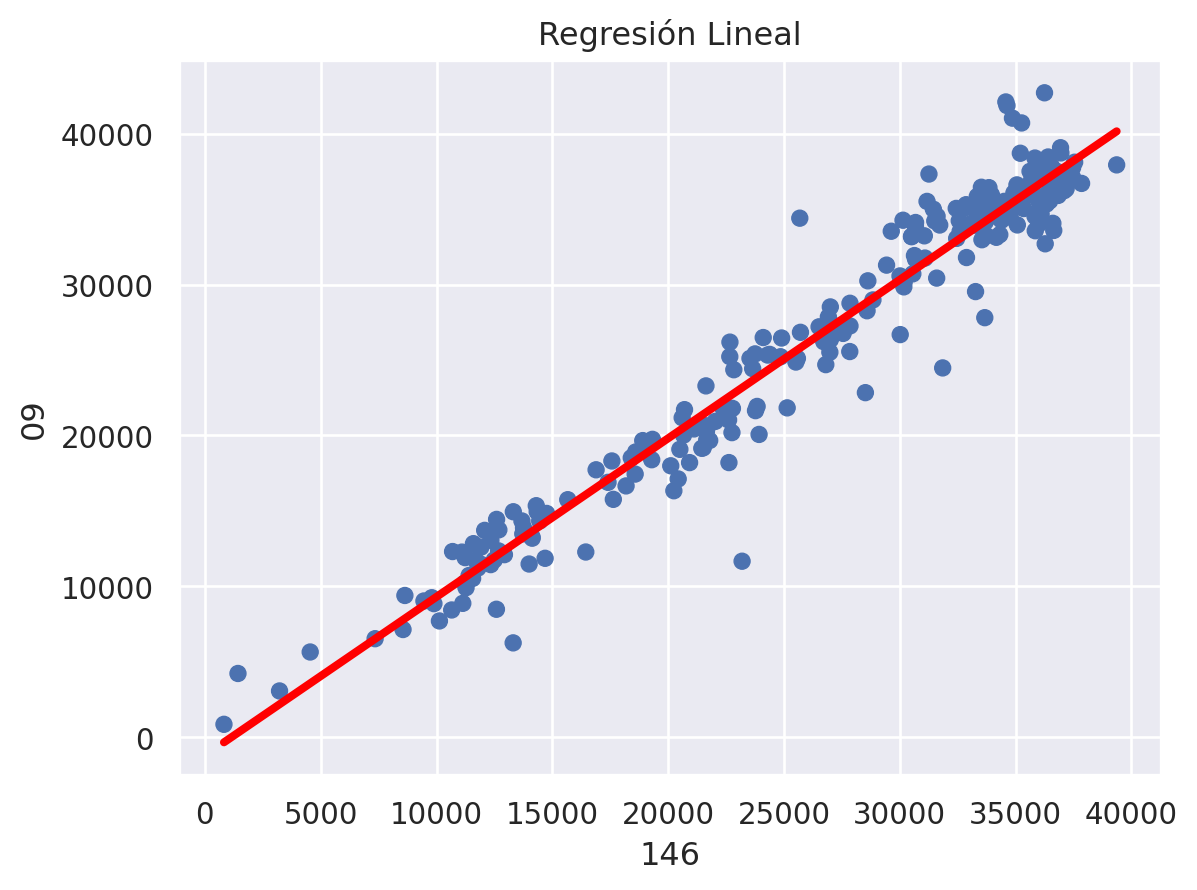

In [61]:
(
    so.Plot(data=pasajeros_por_linea_2023, x='BSAS_LINEA_146', y='BSAS_LINEA_009')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1))
    .label(title='Regresión Lineal', x='146', y='09')   
)

También podemos probar una Regresión Lineal mezclando muchas líneas, por ejemplo:

In [62]:
selected_lines = ['BSAS_LINEA_146', 'LINEA 101', 'LINEA 7', 'BSAS_LINEA_024','LINEA 107']

X = pasajeros_por_linea_2023[selected_lines].values
y = pasajeros_por_linea_2023['BSAS_LINEA_009'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)
print("RMSE", rmse)

MSE: 3990235.929285929
R²: 0.9583714250294263
RMSE 1997.557490858756


#### Pero podemos ver que sigue aproximando mejor solo la regresión con la línea 146. Probemos hacer la Regresión de Ridge con esta línea:

In [68]:
X = pasajeros_por_linea_2023['BSAS_LINEA_146'].values.reshape(-1, 1)  
y = pasajeros_por_linea_2023['BSAS_LINEA_009'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

beta_0 = model.intercept_.item()
beta_1 = model.coef_.item()
mse_ridge = mean_squared_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Regresion Ridge, Beta 1:", beta_1)
print("Regresion Ridge, Beta 0:", beta_0)
print("Regresión Ridge, MSE:", mse_ridge)
print("Regresión Ridge,  R²:", r2_ridge)
print("Regresión Ridge, RMSE:", rmse)

Regresion Ridge, Beta 1: 1.0532139565404863
Regresion Ridge, Beta 0: -1324.9375009304204
Regresión Ridge, MSE: 3742972.035143765
Regresión Ridge,  R²: 0.9609510327862676
Regresión Ridge, RMSE: 1934.6762093807235


##### Como esperabamos, el RMSE se redució

#### Buscamos el hiperparámetro α:

In [65]:
alphas = np.array([0.01, 0.1, 0.5, 1, 2, 3])

ridge = Ridge(fit_intercept=False)

ridge_cv = GridSearchCV(ridge, param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')

ridge_cv.fit(X_train, y_train)

best_alpha = ridge_cv.best_params_['alpha']
print(f"Mejor alpha para Regresión Ridge: {best_alpha}")

modeloRidge = Ridge(alpha=best_alpha, fit_intercept=False)
modeloRidge.fit(X_train, y_train)

y_pred_ridge = modeloRidge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"Raíz del Error Cuadrático Medio (Regresión Ridge): {rmse_ridge:.5f}")


Mejor alpha para Regresión Ridge: 3.0
Raíz del Error Cuadrático Medio (Regresión Ridge): 1940.43653


Finalmente, tenemos que la Regresión de Ridge utilizando la línea 146 es nuestro mejor modelo, dados: <br>
**MSE**: 3742972.035143765
<br>
**R²**: 0.9609510327862676
<br>
**RMSE**: 1934.6762093807235
<br>
**$B_0$**: -1324.9375009304204
<br>
**$B_1$**: 1.0532139565404863
<br>


Y su fórmula es (redondeando):

$$ Y = -1324.94 + 1.05 X$$

